<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng01/A01_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Ipython script should be in the folder.


Made by Boris Oskolkov for Assignment01 (CS5783)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import string
from IPython.display import Image

 --------- start of a first problem --------------

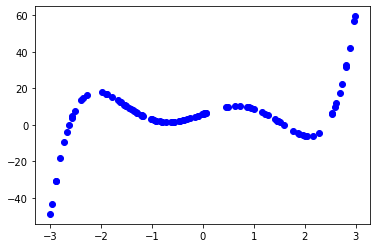

In [6]:
#plot training data
x_data=np.load('x_train.npy')
y_data=np.load('y_train.npy')
plt.plot(x_data, y_data, 'bo')

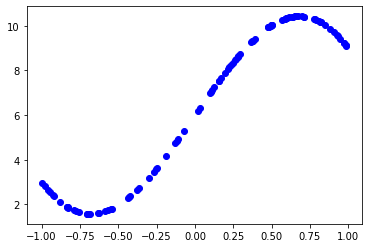

In [7]:
#plotting test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')
plt.plot(x_test, y_test, 'bo')

Answering to the first question, relationship between one variable and output is non-linear. We need to add some non-linearity to the model